# 作品三: 機率分配的樣貌
## 目標：
- ### 繪製曾學過的分配函數，含連續與離散型。
- ### 連續型分配包括常態、卡方、T、Beta、F 等五種。利用改變分配函數的參數，觀察其分配函數的「長相」；也就是窮極所有可能的「形狀」並說明（或標示）與參數間的關係。
- ### 離散型則選擇常態分配。
- ### 連續型分配函數繪圖以 PDF 為主。離散型分配含 PMF（stem 圖） 及 CDF （stairs 圖）。
<hr>

## 連續型分配函數:

## 1. 常態分配的 PDF 函數

## 工作敘述：
## - 畫兩張圖形，一張是 改變 $\sigma$ ，另一張是 改變 $\mu$


- ### $\sigma$ 為 1~5 ， $\mu$ 為 0 的圖

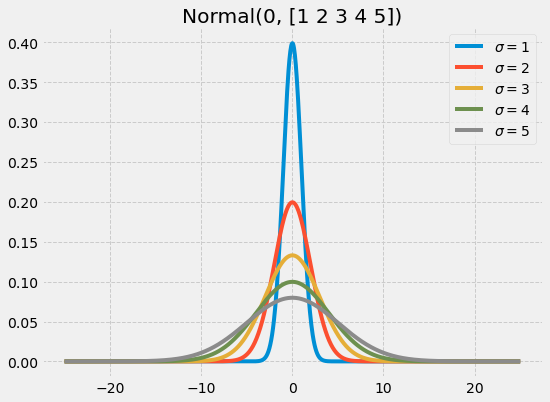

In [9]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
#1
mu = 0 
sigma = np.arange(1,6) 
xlim = [mu - 5 * sigma.max(), mu + 5 * sigma.max()]
x = np.linspace(xlim[0],xlim[1],1000).reshape(-1,1)

plt.figure(figsize = (8,6))
for i in sigma:
    y = norm.pdf(x, mu, i)
    plt.plot(x, y,label='$\sigma={}$'.format(i))
plt.style.use('fivethirtyeight') # 538 style
plt.grid(True, linestyle='--', which='major')
plt.title('Normal({}, {})'.format(mu, sigma))
plt.legend()
plt.show()

- ### $\sigma$ 為 1 ， $\mu$ 為 0~4 的圖

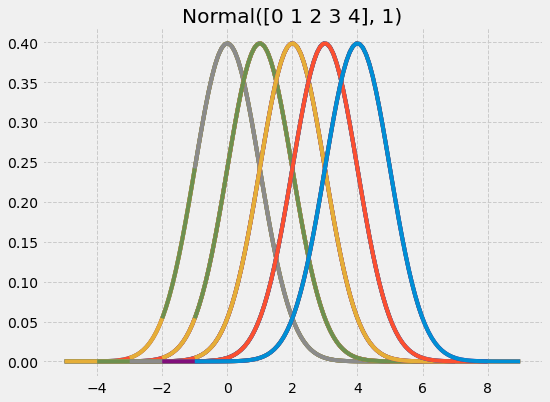

In [11]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
#2
mu = np.arange(0,5)
sigma = 1
xlim = [mu - 5 * sigma, mu + 5 * sigma]
x = np.linspace(xlim[0], xlim[1], 100)

plt.figure(figsize = (8,6))
for j in mu:
    y = norm.pdf(x, j, sigma)
    plt.plot(x, y)
plt.style.use('fivethirtyeight') # 538 style
plt.grid(True, linestyle='--', which='major')
plt.title('Normal({}, {})'.format(mu, sigma))
plt.show()

## 討論：
## - $\mu$ 是位置參數，而 $\sigma$ 尺度參數
## 圖形#1  $\mu$ 不變，$\sigma$ 越大，圖形寬度變寬，無位移
## 圖形#2  $\sigma$ 不變，$\mu$ 越大，圖形長寬不變，向左右位移
<hr>

## 2. 卡方分配的 PDF 函數

## 工作敘述：
## - 將參數放在前排
## - 設定線條顏色不同


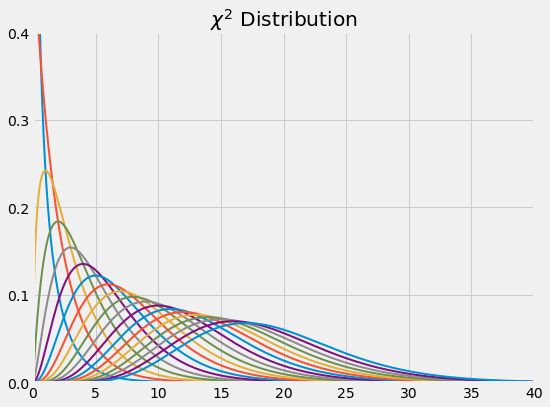

In [25]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
 
xlim = [0, 40]
x = np.linspace(xlim[0], xlim[1], 1000)
df = np.arange(1, 20, 1)

plt.figure(figsize = (8,6))
plt.axis([xlim[0], xlim[1], 0, 0.4])
for i in df:
    y=chi2.pdf(x, i)
    plt.plot(x,y, lw=2)
    # plt.pause(0.5)
 
plt.title(r'$\chi^2$ Distribution')
plt.yticks([0, 0.1, 0.2,0.3,0.4])
plt.grid(True)
plt.show()

- ### 改變df自由度

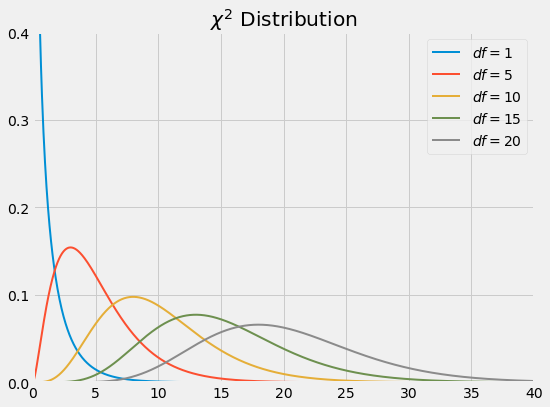

In [37]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
 
xlim = [0, 40]
x = np.linspace(xlim[0], xlim[1], 1000)
df = [1, 5, 10, 15, 20]

plt.figure(figsize = (8,6))
plt.axis([xlim[0], xlim[1], 0, 0.4])
label = []
for i in df:
    y=chi2.pdf(x, i)
    plt.plot(x,y, lw=2)
    label.append('$df={}$'.format(i)) 
    # plt.pause(0.5)
 
plt.title(r'$\chi^2$ Distribution')
plt.yticks([0, 0.1, 0.2,0.3,0.4])
plt.legend(label)
plt.grid(True)
plt.show()

## 討論：
## - 卡方分配為一右偏分配圖形
## - df 是影響形狀、位置的參數，當自由度愈大，向右偏斜程度愈小，圖形逐漸平坦
<hr>

## 3. $T$分配的 PDF 函數

## 工作敘述：
## - 將參數固定在前排
## - 兩個 df 結合成同一向量
## - 將 t 分配與正常分配做比較

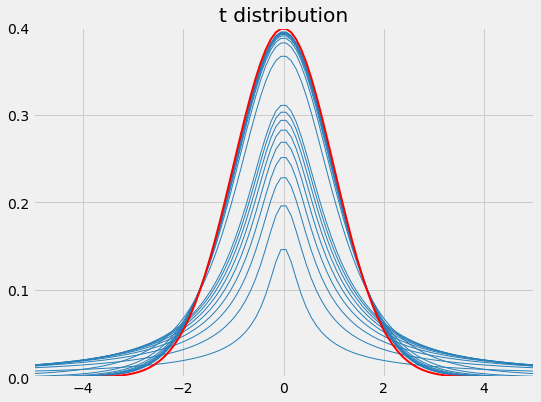

In [57]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt

xlim = [-6, 6]
x = np.linspace(xlim[0], xlim[1], 1000)
color = '#2980B9'
mu = 0
sigma = 1
xlim = [mu - 5 * sigma, mu + 5 * sigma]
x = np.linspace(xlim[0], xlim[1], 100)

# df
df = np.arange(0.1, 1, 0.1)
df1 = np.arange(3, 30, 3)
# df df1 合併 
df2 = np.concatenate((df.T, df1.T), axis=0)

plt.figure(figsize=(8,6))
plt.axis([xlim[0], xlim[1], 0, 0.2])
for i in df2:
    y = t.pdf(x, i)
    plt.plot(x, y, lw=1, color=color)

y = norm.pdf(x, mu, sigma)
plt.plot(x, y, color='r', linewidth=2)

yticks = np.arange(0, 0.45, 0.1)
plt.title(r't distribution')
plt.yticks(yticks)
plt.grid(True)
plt.show()

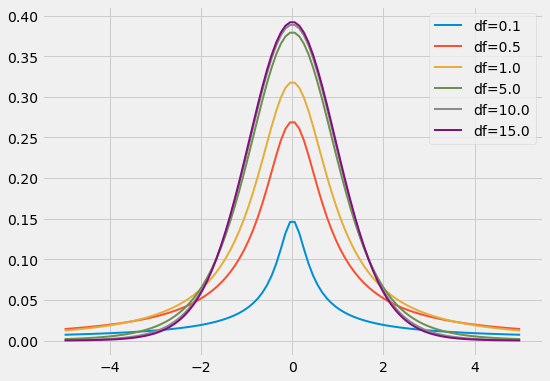

In [59]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt

xlim = [-6, 6]
x = np.linspace(xlim[0], xlim[1], 1000)
color = '#2980B9'
mu = 0
sigma = 1
xlim = [mu - 5 * sigma, mu + 5 * sigma]
x = np.linspace(xlim[0], xlim[1], 100)

df_ = np.array([0.1,0.5,1,5,10,15])
x_ = np.linspace(xlim[0],xlim[1],100)
y_ = t.pdf(x,df_.reshape(-1,1)).T
plt.figure(figsize = (8,6))
plt.plot(x_,y_,linewidth=2)
l = []
for i in df_:
    l += ['df={}'.format(i)]
plt.legend(labels=l)
plt.show()

## 討論：
## - y最大值為0.4
## - 樣本超過30後，t檢定和常態分配檢定已趨近一致
## - 自由度增加，圖形逐漸增高，增加幅度也隨著自由度越來越大而越小，直到達某定值時，圖形不再變化
<hr>

## 4. $\beta$分配的 PDF 函數

## 工作敘述：
## - 因 jupyter 檔無 plt.pause() 之功能，因此把圖形分為左右兩圖來比較
## - 將參數定在前排

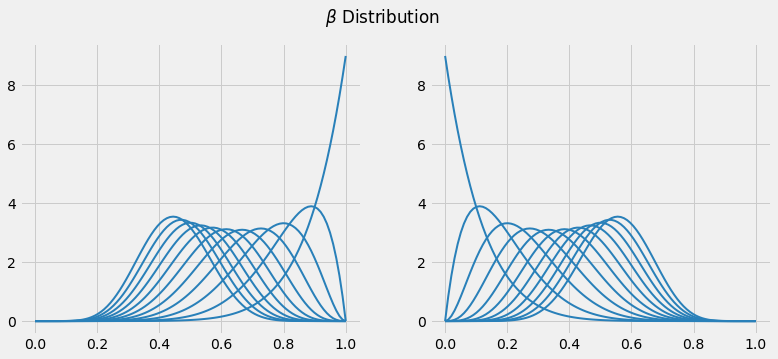

In [82]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

a = 9
b = np.arange(1, 12)
x = np.linspace(0, 1, 100)
color = '#2980B9'
width = 2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for i in b:
    y = beta.pdf(x, a, i)
    y1 = beta.pdf(x, i, a)
    ax1.plot(x, y, color=color, linewidth=width)
    ax2.plot(x, y1, color=color, linewidth=width)

plt.suptitle(r'$\beta$ Distribution')
plt.show()


## 討論：
## - a, b 是形狀參數
## - 當 a, b > 1 ， 呈現類高斯的分佈
##   a 固定為 9 : (1) b 小於 a 時，圖形左偏  (2) b 大於 a 時，圖形右偏 
##   b 固定為 9 : (1) a 小於 b 時，圖形左偏  (2) a 大於 b 時，圖形右偏 
## - 左圖、右圖 : a, b 相反，圖形左右偏相反

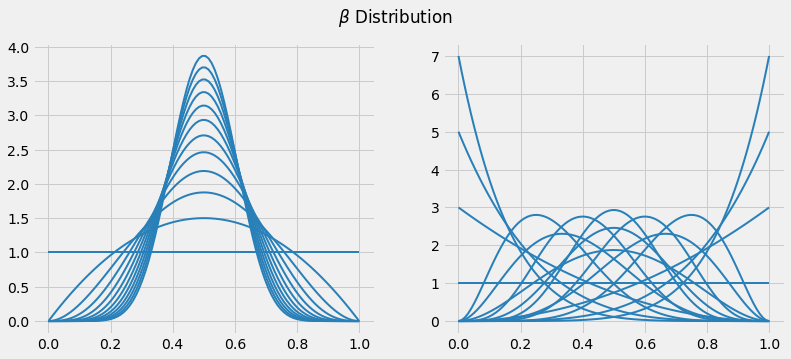

In [83]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

ab = np.arange(1, 13)
ab1 = np.arange(1, 9, 2)
x = np.linspace(0, 1, 100)
color = '#2980B9'
width = 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for i in ab:
    y = beta.pdf(x, i, i)
    ax1.plot(x, y, color=color, linewidth=width)

for i in ab1:
    for j in ab1:
        y = beta.pdf(x, j, i)
        ax2.plot(x, y, color=color, linewidth=width)

plt.suptitle(r'$\beta$ Distribution')
plt.show()


## 討論：
## - a, b 是形狀參數
## 左圖 : 
## (1) a = b = 1 時，呈現一條直線，表示均勻分佈，所有參數發生之機率相同
## (2) a = b = 2 時，呈現拋物線
## (3) a = b > 1 時，$\beta$ 分布都是對稱的，分布呈山峰狀凸起
## 右圖 : 呈現遞減或遞增型的分佈
<hr>

## 5. $F$分配的 PDF 函數

## 工作敘述：
## - 將變數放在前排
## - 將 df2 固定為 60 ，觀察圖形變動情形
## - 將 df1 固定為 30 ，觀察圖形變動情形

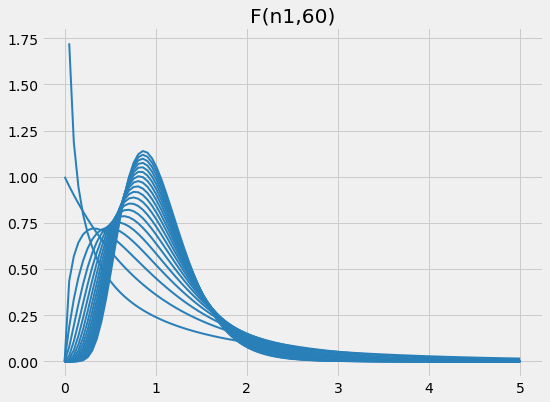

In [71]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt

n1 = np.arange(0,20).reshape(-1,1)
n2 = 60
x = np.linspace(0,5,100)
color='#2980B9'

plt.figure(figsize=(8,6))
for i in n1:
    y = f.pdf(x,i,n2).T
    plt.plot(x,y,color=color,linewidth=2)
plt.title('F(n1,60)')
plt.show()

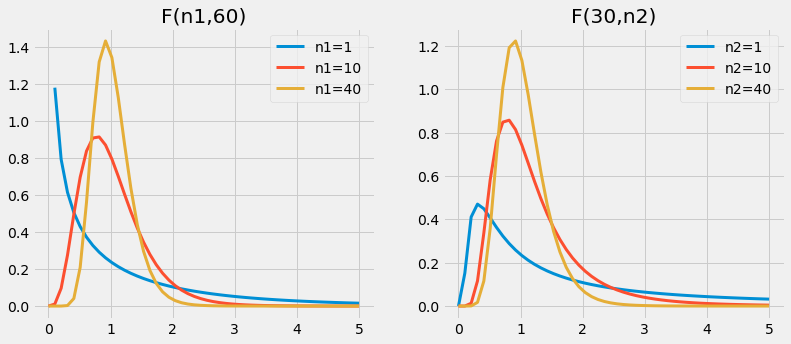

In [96]:
import numpy as np
from scipy.stats import f
import matplotlib.pyplot as plt

n1 = [1,10,40]#np.array([1,10,40])
n2 = 60
x = np.linspace(0,5,50)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
for i in n1:
    y = f.pdf(x,i,n2)
    ax1.plot(x,y,linewidth=3)
ax1.set_title('F(n1,60)')
ax1.legend(labels = ['n1=1', 'n1=10', 'n1=40'])
n1 = 30
n2 = [1,10,40]
x = np.linspace(0,5,50)

for i in n2:
    y = f.pdf(x,n1,i)
    ax2.plot(x,y,linewidth=3)
ax2.set_title('F(30,n2)')
ax2.legend(labels = ['n2=1', 'n2=10', 'n2=40'])
plt.show()

## 討論：
## - 兩個形狀參數 : 分子自由度、分母自由度 
## - 一般情況， F 分配大致呈右偏現象，但當其中一個或二個自由度增大時，F 分配曲線會逐漸趨近對稱
## - 自由度 n1 和 n2 都會隨著值增加,造成圖形的最高點變大
## - df1 變小時，圖形呈遞減
<hr>

## 5. 常態分配的 CDF 函數

## 工作敘述：
## - 將前面常態分配的圖改為 CDF 圖
## - 依據 $\sigma$ 的變動呈現不同線條顏色

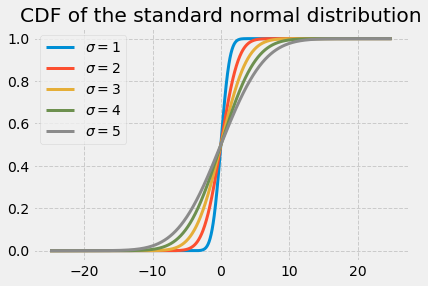

In [18]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

mu = 0 
sigma = np.arange(1,6) 
xlim = [mu - 5 * sigma.max(), mu + 5 * sigma.max()]
#x = np.linspace(xlim[0], xlim[1], 1000) 
x = np.linspace(xlim[0],xlim[1],1000).reshape(-1,1)

for i in sigma:
    y = norm.cdf(x, mu, i)
    plt.plot(x, y,label='$\sigma={}$'.format(i),linewidth=3)

plt.style.use('fivethirtyeight') # 538 style

plt.grid(True, linestyle='--', which='major')
plt.title('CDF of the standard normal distribution')
plt.legend()
plt.show()

## 討論：
## - $\sigma$ 越小，在趨近於0的正或負斜率越大，圖形呈現越陡

## 離散型分配函數:

(0.0, 20.0)

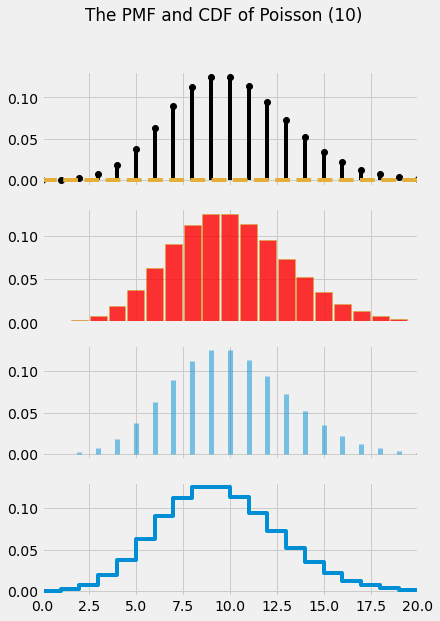

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
n = 20
lamda = 10

fig, ax = plt.subplots(4, 1, figsize=[6, 9], sharex='col')
x = np.arange(n+1)
y = poisson.pmf(x, lamda)

ax[0].stem(x, y, basefmt='C2--', markerfmt='ko', linefmt='k-')
ax[1].bar(x, y, color='r', edgecolor='y', width=0.9, alpha=0.8)
ax[2].vlines(x, 0, y, lw=5, alpha=0.5)
Y = poisson.cdf(x, lamda)
ax[3].plot(x, y, drawstyle='steps-pre')
plt.suptitle('The PMF and CDF of Poisson ({})'.format(lamda))
plt.xlim(0, 20)

## 討論:
## - Poisson 的 CDF 圖形呈階梯狀